# D Simulation formulae, II: multivariate case

In the multivariate case, we consider specific example

$$
\sigma(x) = \begin{pmatrix} s(x_2) & 0 \\ 0 & s(x_1) \end{pmatrix}, \quad b(x) = \begin{pmatrix} s^2(x_2) & 0 \\ 0 & s^2(x_1) \end{pmatrix}
$$

<!-- $\color{red}{\text{Explicit Definition of } a \text{ and } s}$ -->

$$
s(x) = 2 + \sin x, \quad a(x) = \begin{pmatrix} a_1(x) \\ a_2(x) \end{pmatrix} = \begin{pmatrix} x_2 \\ -x_1 \end{pmatrix}, \quad x_{start} = \begin{pmatrix} 1 \\ 1 \end{pmatrix}, \quad T = 1
$$

## D.1 Simulation schemes

$w_1, w_2 \sim N(0, t)$ are independent

$$
\begin{aligned}
\overline{X}^{0.5}(x, t, w) &= x + \begin{pmatrix} a_1(x) \\ a_2(x) \end{pmatrix} t + \begin{pmatrix} s(x_2)w_1 \\ s(x_1)w_2 \end{pmatrix}, \\
\overline{X}^{1.0}(x, t, w) &= x + \begin{pmatrix} a_1(x) \\ a_2(x) \end{pmatrix} t + \begin{pmatrix} s(x_2)w_1 \\ s(x_1)w_2 \end{pmatrix} + \frac{1}{2} \begin{pmatrix} s'(x_2)s(x_1)w_1w_2 \\ s'(x_1)s(x_2)w_1w_2 \end{pmatrix}, \\
\overline{X}^{x, 1.5}(x, t, w) &= x + \begin{pmatrix} a_1(x) \\ a_2(x) \end{pmatrix} t + \begin{pmatrix} s(x_2)w_1 \\ s(x_1)w_2 \end{pmatrix} + \frac{1}{2} \begin{pmatrix} s'(x_2)s(x_1)w_1w_2 \\ s'(x_1)s(x_2)w_1w_2 \end{pmatrix} \\
&\quad + \frac{t}{2} \begin{pmatrix} \partial_1 a_1(x)s(x_2)w_1 + \partial_2 a_1(x)s(x_1)w_2 + s'(x_2)a_2(x)w_1 \\ \partial_1 a_2(x)s(x_2)w_1 + \partial_2 a_2(x)s(x_1)w_2 + s'(x_1)a_1(x)w_2 \end{pmatrix} \\
&\quad + \frac{t}{8} \begin{pmatrix} 2s''(x_2)s(x_1)^2w_1 + \frac{[s'(x_2)s(x_1)]^2}{s(x_2)}w_1 - s'(x_1)s'(x_2)s(x_2)w_2 \\ 2s''(x_1)s(x_2)^2w_1 + \frac{[s'(x_1)s(x_2)]^2}{s(x_1)}w_1 - s'(x_1)s(x_1)s'(x_2)w_1 \end{pmatrix} \\
&\quad + \begin{pmatrix} \frac{1}{24}\frac{(s'(x_2))^2}{s(x_2)}s(x_1)^2w_t^{111} + \frac{1}{12}s'(x_1)s'(x_2)s(x_2)w_t^{112} + \frac{1}{6}s''(x_2)s(x_1)^2w_t^{122} + \frac{1}{24}\frac{(s'(x_2))^2}{s(x_2)}s(x_1)^2w_t^{122} \\ \frac{1}{24}\frac{(s'(x_1))^2}{s(x_1)}s(x_2)^2w_t^{222} + \frac{1}{12}s'(x_1)s'(x_2)s(x_1)w_t^{122} + \frac{1}{6}s''(x_1)s(x_2)^2w_t^{112} + \frac{1}{24}\frac{(s'(x_1))^2}{s(x_1)}s(x_2)^2w_t^{112} \end{pmatrix},
\end{aligned}
$$
where

$$
w_t^{111} = (w_1)^3 - 3tw_1,\quad
w_t^{222} = (w_2)^3 - 3tw_2,\quad
w_t^{112} = \big((w_1)^2 - t\big)w_2,\quad
w_t^{122} = \big((w_2)^2 - t\big)w_1
$$

## D.2 Test functional based on the local time

We can use, for simplicity, a test functional based on the discrete approximation of the local time at the point \(a\) for one component of the process, e.g. _which component_

$$
F_n(\overline{X}) = f\!\left(L_n^a(\overline{X}^1)\right).
$$

$$
f(x) = \arctan(x)
$$

Fancier possibility: local times on fractals, e.g. Sierpinski's carpet should be easy to program because of the square shape …

### D.3 Test functionals for the lower bounds for TV-distance

We still can use the test functionals

\[
F_n^{E}(\overline{X})
=\mathrm{sgn}\!\left(
\sum_{k=1}^{n}\Delta^{1}\!\left(h_n,X_{t_{k-1}},X_{t_k}\right)
-\frac12\sum_{k=1}^{n}\left[\Delta^{1}\!\left(h_n,X_{t_{k-1}},X_{t_k}\right)\right]^2
\right),
\]

\[
F_n^{M}(\overline{X})
=h_n^{-1/2}\mathrm{sgn}\!\left(
\sum_{k=1}^{n}\Delta^{2}\!\left(h_n,X_{t_{k-1}},X_{t_k}\right)
\right),
\]
but with new formulae
\[
\Delta_t^{1}(x,y)
=\frac12 t^{2}s'(x_2)s(x_2)s^{2}(x_1)\,H_t^{112}(x,y)
+\frac12 t^{2}s'(x_1)s(x_1)s^{2}(x_2)\,H_t^{221}(x,y),
\]
\[
\begin{aligned}
\Delta_t^{2}(x,y)
&=\frac{t^{2}}{2}\,\partial_{1}a_{1}(x)S(x_{2})\,H_t^{11}(x,y)
+\frac{t^{2}}{2}\,\partial_{2}a_{1}(x)S(x_{1})\,H_t^{12}(x,y) \\
&\quad+\frac{t^{2}}{2}\,\partial_{1}a_{2}(x)S(x_{2})\,H_t^{12}(x,y)
+\frac{t^{2}}{2}\,\partial_{2}a_{2}(x)S(x_{1})\,H_t^{22}(x,y) \\
&\quad+\frac{t^{2}}{4}\,S'(x_{2})a_{2}(x)\,H_t^{11}(x,y)
+\frac{t^{2}}{4}\,S'(x_{1})a_{1}(x)\,H_t^{22}(x,y) \\
&\quad+\frac{t^{2}}{4}\,s''(x_{2})s(x_{2})s(x_{1})^{2}\,H_t^{11}(x,y)
+\frac{t^{2}}{4}\,s''(x_{1})s(x_{1})s(x_{2})^{2}\,H_t^{22}(x,y) \\
&\quad+\frac{t^{2}}{8}\,[s'(x_{2})s(x_{1})]^{2}\,H_t^{11}(x,y)
+\frac{t^{2}}{8}\,[s'(x_{1})s(x_{2})]^{2}\,H_t^{22}(x,y)
-\frac{t^{2}}{4}\,s'(x_{1})s(x_{1})s'(x_{2})s(x_{2})\,H_t^{12}(x,y) \\
&\quad+\frac{t^{3}}{24}\,(s'(x_{2}))^{2}s(x_{1})^{2}s(x_{2})^{2}\,H_t^{1111}(x,y)
+\frac{t^{3}}{24}\,(s'(x_{1}))^{2}s(x_{1})^{2}s(x_{2})^{2}\,H_t^{2222}(x,y) \\
&\quad+\frac{t^{3}}{12}\,s'(x_{1})s'(x_{2})s(x_{1})s(x_{2})^{3}\,H_t^{1112}(x,y)
+\frac{t^{3}}{12}\,s'(x_{1})s'(x_{2})s(x_{1})^{3}s(x_{2})\,H_t^{1222}(x,y) \\
&\quad+\left[
\frac{t^{3}}{6}\,s''(x_{1})s(x_{1})s(x_{2})^{4}
+\frac{t^{3}}{6}\,s''(x_{2})s(x_{2})s(x_{1})^{4}
+\frac{t^{3}}{24}\,(s'(x_{2}))^{2}s(x_{1})^{4}
+\frac{t^{3}}{24}\,(s'(x_{1}))^{2}s(x_{2})^{4}
\right] H_t^{1122}(x,y).
\end{aligned}
\]

### 2DLT

<>:59: SyntaxWarning: invalid escape sequence '\m'
<>:59: SyntaxWarning: invalid escape sequence '\m'
/var/folders/m0/42vx1flj71n3c30zs2466stc0000gn/T/ipykernel_27545/3027647254.py:59: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mathrm{Local\quad Time}$ ")


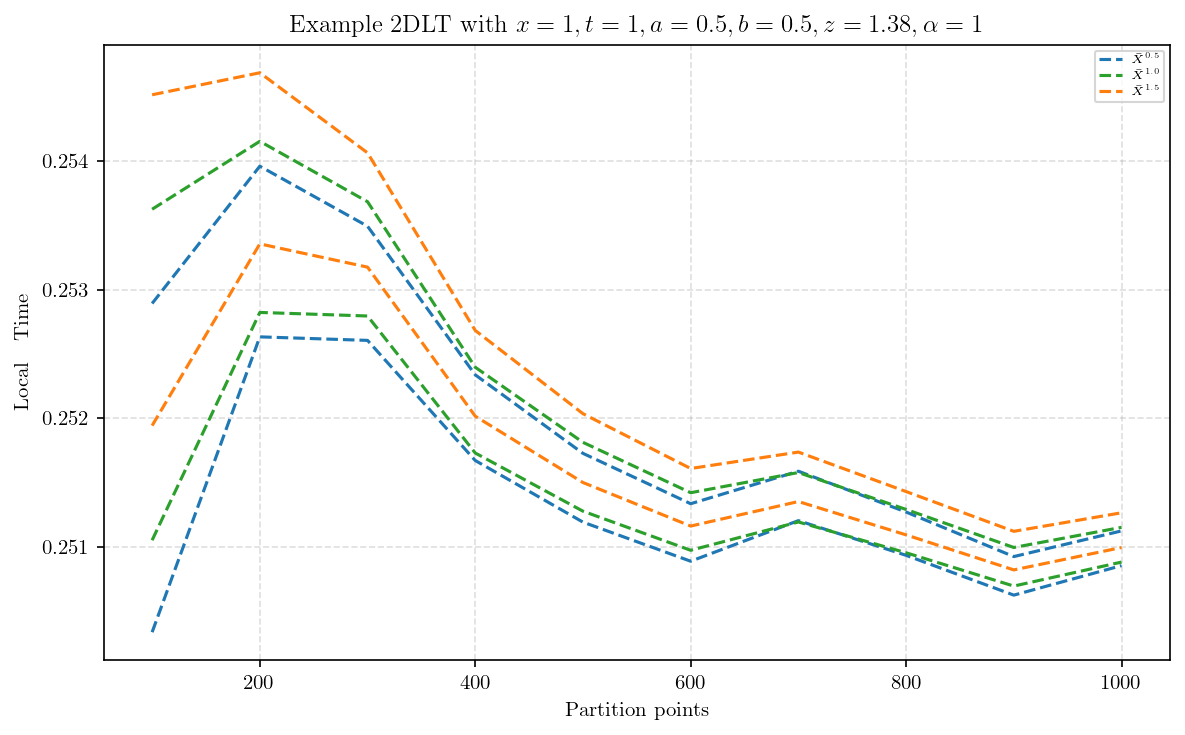

image saved to: sim_pics/2DLT.png


In [4]:
#2DLT
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
save_dir = Path("sim_pics")# フォルダー保存先
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "2DLT.png" #画像保存パス

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percaent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df2 = pd.read_csv("../data_source/2DLT_100_1000_data.csv")
df3 = pd.read_csv("../data_source/2DLT_100_1000_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df2=np.sqrt(df2['E']) #Aの標本標準偏差(SD)
Am_std_df2=np.sqrt(df2['Em']) #Amの標本標準偏差(SD)
A15_std_df2=np.sqrt(df2['E_1.5']) #A_1_5の標本標準偏差(SD)

paths = 10 * (df2['points'] ** 2)
# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)

# Confidence bands
A_up_df2     = df2['A']     + z * A_se_df2
A_low_df2    = df2['A']     - z * A_se_df2
Am_up_df2    = df2['Am']    + z * Am_se_df2
Am_low_df2   = df2['Am']    - z * Am_se_df2
A15_up_df2   = df2['A_1.5'] + z * A15_se_df2
A15_low_df2  = df2['A_1.5'] - z * A15_se_df2


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df2["points"], A_up_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df2["points"], A_low_df2, linestyle="--", color="#1f77b4")  
plt.plot(df2["points"], Am_up_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")
plt.plot(df2["points"], Am_low_df2, linestyle="--", color="#2ca02c")  
plt.plot(df2["points"], A15_up_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
plt.plot(df2["points"], A15_low_df2, linestyle="--", color="#ff7f0e")


plt.title(r'Example 2DLT with $x=1,t=1,a=0.5,b=0.5,z=1.38,\alpha=1$')
plt.xlabel("Partition points")
plt.ylabel("$\mathrm{Local\quad Time}$ ")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)

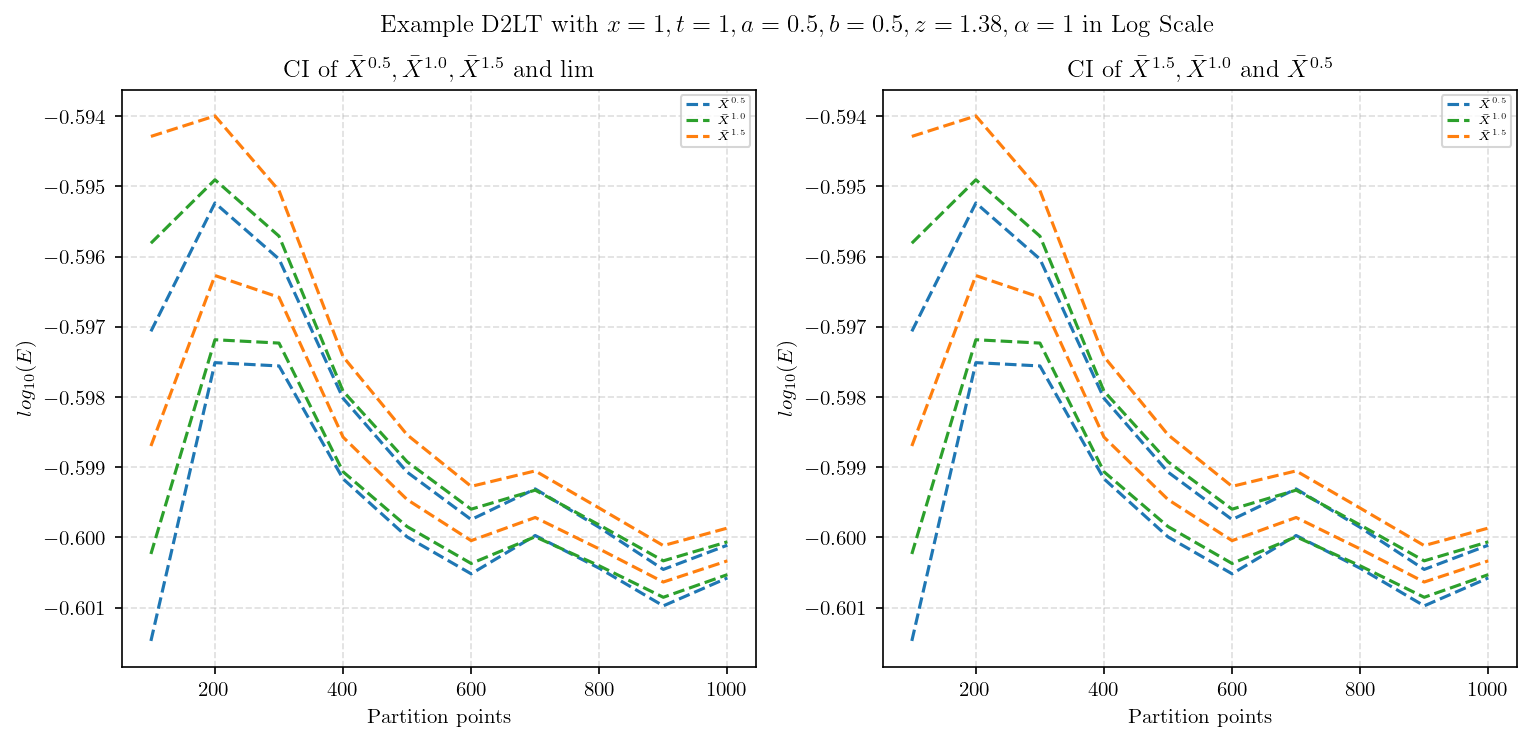

image saved to: sim_pics/D2SM1_and_lim_100_1000_subplot.png


In [5]:
#2DLT_log
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
save_dir = Path("sim_pics")  # フォルダー保存先
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "D2SM1_and_lim_100_1000_subplot.png"  # 画像保存パス（ファイル名だけ変更）

# 信頼水準(confidence level)の関数
def conf_level(a):  # aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a
    z = norm.ppf(1 - alpha / 2)
    return z

df2 = pd.read_csv("../data_source/2DLT_100_1000_data.csv")
df3 = pd.read_csv("../data_source/2DLT_100_1000_data.csv")

# z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a = 0.95
z = conf_level(a)

A_std_df2   = np.sqrt(df2['E'])      # Aの標本標準偏差(SD)
Am_std_df2  = np.sqrt(df2['Em'])     # Amの標本標準偏差(SD)
A15_std_df2 = np.sqrt(df2['E_1.5'])  # A_1_5の標本標準偏差(SD)


paths = 10 * (df2['points'] ** 2)

# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)


# Confidence bands
A_up_df2     = df2['A']      + z * A_se_df2
A_low_df2    = df2['A']      - z * A_se_df2
Am_up_df2    = df2['Am']     + z * Am_se_df2
Am_low_df2   = df2['Am']     - z * Am_se_df2
A15_up_df2   = df2['A_1.5']  + z * A15_se_df2
A15_low_df2  = df2['A_1.5']  - z * A15_se_df2


#Confidence bands in Log scale
A_up_df2_log     = np.log10(abs(A_up_df2))
A_low_df2_log    = np.log10(abs(A_low_df2))
Am_up_df2_log    = np.log10(abs(Am_up_df2))
Am_low_df2_log   = np.log10(abs(Am_low_df2))
A15_up_df2_log   = np.log10(abs(A15_up_df2))
A15_low_df2_log  = np.log10(abs(A15_low_df2))
    


# ---------- ここから subplot で 2 枚の図を描画 ----------
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=150)

# ===== 左側の図：元の3種類の信頼区間 =====
ax1 = axes[0]
ax1.plot(df2["points"], A_up_df2_log,  linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax1.plot(df2["points"], A_low_df2_log, linestyle="--", color="#1f77b4")
ax1.plot(df2["points"], Am_up_df2_log,  linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax1.plot(df2["points"], Am_low_df2_log, linestyle="--", color="#2ca02c")
ax1.plot(df2["points"], A15_up_df2_log,  linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax1.plot(df2["points"], A15_low_df2_log, linestyle="--", color="#ff7f0e")

ax1.set_title(r'CI of $\bar{X}^{0.5}, \bar{X}^{1.0}, \bar{X}^{1.5}$ and $\lim$')
ax1.set_xlabel("Partition points")
ax1.set_ylabel(r"$log_{10}(E)$")
ax1.grid(True, linestyle="--", alpha=0.4)
ax1.legend(fontsize=5.5, loc='best')

# ===== 右側の図：指定された4本の線の図 =====
ax2 = axes[1]
ax2.plot(df2["points"], A_up_df2_log,  linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax2.plot(df2["points"], A_low_df2_log, linestyle="--", color="#1f77b4")
ax2.plot(df2["points"], Am_up_df2_log,  linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax2.plot(df2["points"], Am_low_df2_log, linestyle="--", color="#2ca02c")
ax2.plot(df2["points"], A15_up_df2_log,  linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax2.plot(df2["points"], A15_low_df2_log, linestyle="--", color="#ff7f0e")


ax2.set_title(r'CI of $\bar{X}^{1.5},\bar{X}^{1.0}$ and $\bar{X}^{0.5}$')
ax2.set_xlabel("Partition points")
ax2.set_ylabel(r"$log_{10}(E)$")
ax2.grid(True, linestyle="--", alpha=0.4)
ax2.legend(fontsize=5.5, loc='best')

# 全体タイトル（必要なら）
fig.suptitle(r'Example D2LT with $x=1,t=1,a=0.5,b=0.5,z=1.38,\alpha=1$ in Log Scale')
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)

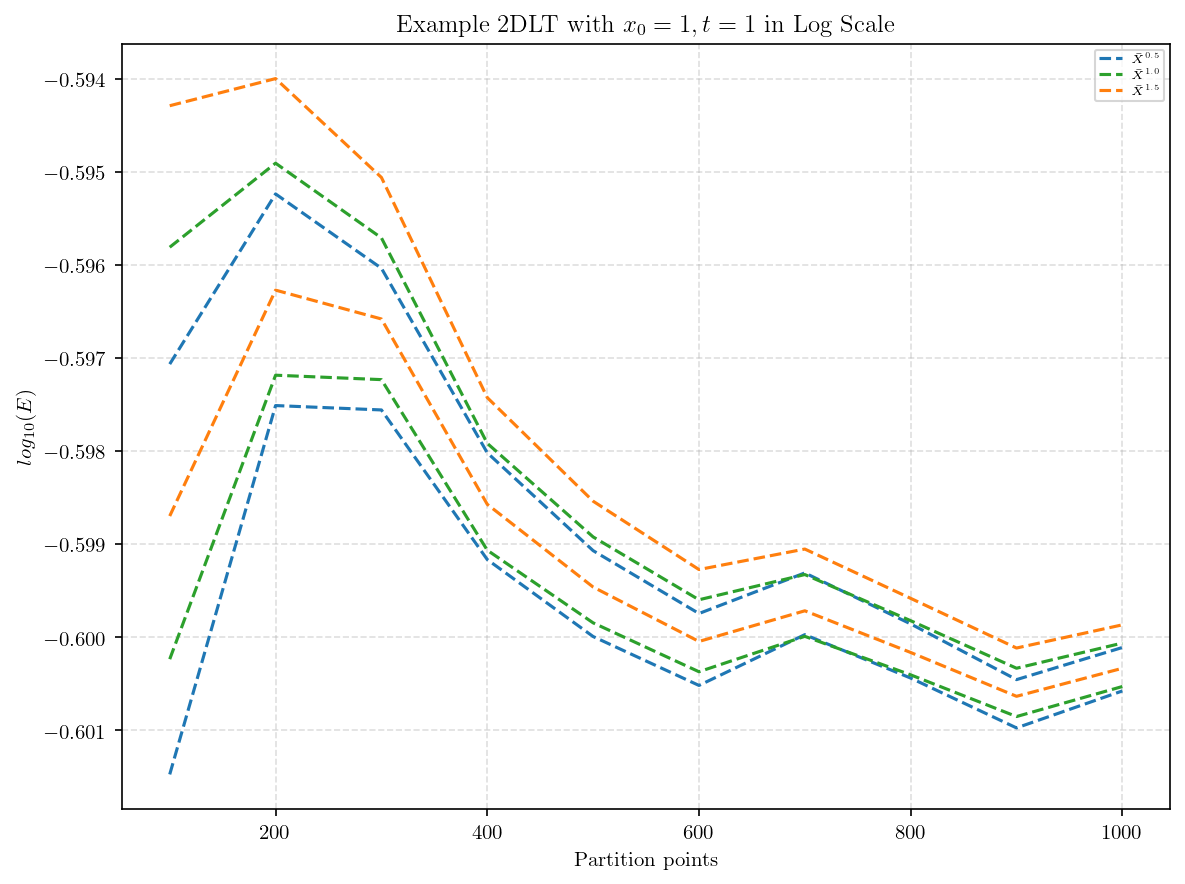

image saved to: sim_pics/2DLT_log.png


In [16]:
#2DLT_log
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path

# 设置字体（根据系统环境可能需要调整，如 'SimHei', 'Arial Unicode MS' 等）
plt.rcParams['font.family'] = 'Hiragino Sans'  
save_dir = Path("sim_pics")  # フォルダー保存先
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "2DLT_log.png"  # 画像保存パス

# 信頼水準(confidence level)の関数
def conf_level(a):  # aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a
    z = norm.ppf(1 - alpha / 2)
    return z

try:
    df2 = pd.read_csv("../data_source/2DLT_100_1000_data.csv")
except FileNotFoundError:
    print("Warning: CSV file not found. Ensure the path is correct.")
    df2 = pd.DataFrame({'points': np.linspace(10, 100, 20)})
    df2['E'] = np.random.rand(20) * 0.1
    df2['Em'] = np.random.rand(20) * 0.1
    df2['E_1.5'] = np.random.rand(20) * 0.1
    df2['A'] = np.sin(df2['points']/10)
    df2['Am'] = np.sin(df2['points']/10) + 0.5
    df2['A_1.5'] = np.sin(df2['points']/10) + 1.0


# z信頼水準の計算
a = 0.95
z = conf_level(a)

A_std_df2   = np.sqrt(df2['E'])      # Aの標本標準偏差(SD)
Am_std_df2  = np.sqrt(df2['Em'])     # Amの標本標準偏差(SD)
A15_std_df2 = np.sqrt(df2['E_1.5'])  # A_1_5の標本標準偏差(SD)

paths = 10 * (df2['points'] ** 2)

# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)


# Confidence bands
A_up_df2     = df2['A']      + z * A_se_df2
A_low_df2    = df2['A']      - z * A_se_df2
Am_up_df2    = df2['Am']     + z * Am_se_df2
Am_low_df2   = df2['Am']     - z * Am_se_df2
A15_up_df2   = df2['A_1.5']  + z * A15_se_df2
A15_low_df2  = df2['A_1.5']  - z * A15_se_df2


# Confidence bands in Log scale
A_up_df2_log     = np.log10(abs(A_up_df2))
A_low_df2_log    = np.log10(abs(A_low_df2))
Am_up_df2_log    = np.log10(abs(Am_up_df2))
Am_low_df2_log   = np.log10(abs(Am_low_df2))
A15_up_df2_log   = np.log10(abs(A15_up_df2))
A15_low_df2_log  = np.log10(abs(A15_low_df2))
    


fig, ax = plt.subplots(figsize=(8, 6), dpi=150)

#  (0.5)
ax.plot(df2["points"], A_up_df2_log,  linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax.plot(df2["points"], A_low_df2_log, linestyle="--", color="#1f77b4")

# (1.0)
ax.plot(df2["points"], Am_up_df2_log,  linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax.plot(df2["points"], Am_low_df2_log, linestyle="--", color="#2ca02c")

# (1.5)
ax.plot(df2["points"], A15_up_df2_log,  linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax.plot(df2["points"], A15_low_df2_log, linestyle="--", color="#ff7f0e")


ax.set_title(r'Example 2DLT with $x_0=1,t=1$ in Log Scale')
ax.set_xlabel("Partition points")
ax.set_ylabel(r"$log_{10}(E)$")
ax.grid(True, linestyle="--", alpha=0.4)


ax.legend(fontsize=8, loc='best')
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)

### 2DLT_Var

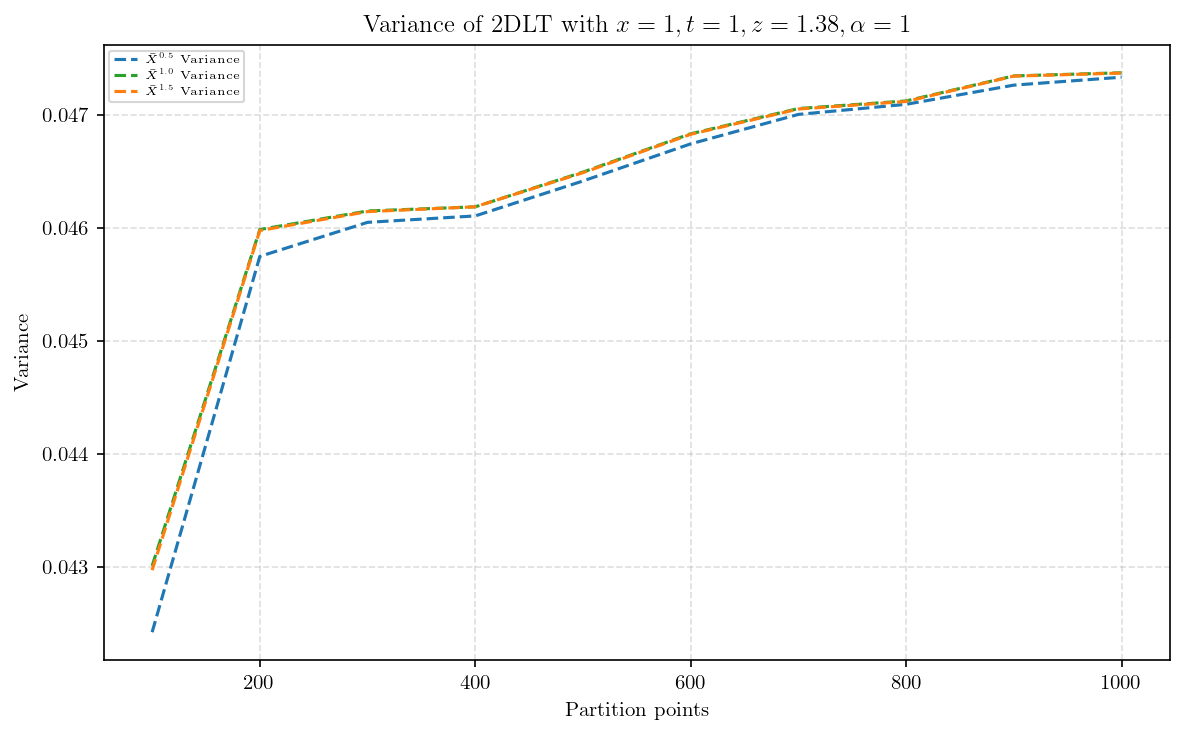

In [3]:
#2DLT variance plot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
df = pd.read_csv("../data_source/2DLT_100_1000_data.csv")

#分散
variance_A = df['E']
variance_Am = df['Em']
variance_A15 = df['E_1.5']

plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df["points"], variance_A, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$ Variance")
plt.plot(df["points"], variance_Am, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ Variance")
plt.plot(df["points"], variance_A15, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ Variance")
plt.title(r'Variance of 2DLT with $x=1,t=1,z=1.38,\alpha=1$')
plt.xlabel("Partition points")
plt.ylabel("Variance")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する


### 2DD1SM3


<>:59: SyntaxWarning: invalid escape sequence '\m'
<>:59: SyntaxWarning: invalid escape sequence '\m'
/var/folders/m0/42vx1flj71n3c30zs2466stc0000gn/T/ipykernel_56329/3397441020.py:59: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mathrm{E}$ ")


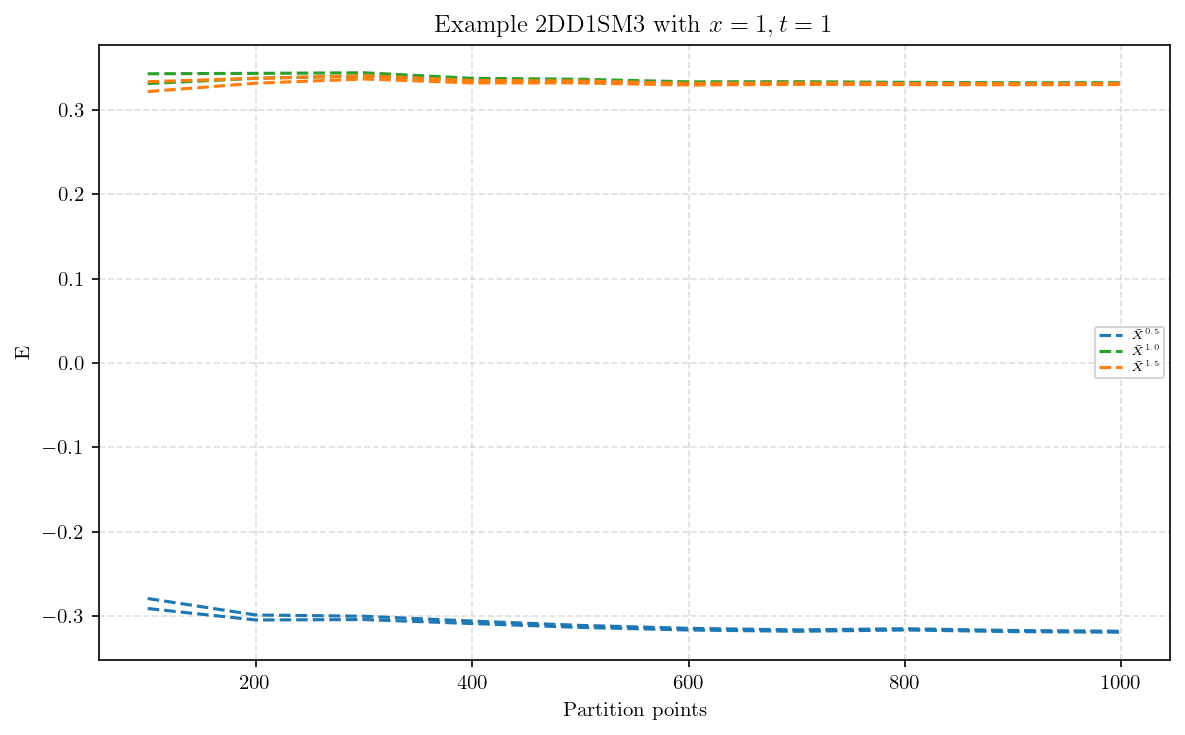

image saved to: sim_pics/2DD1SM3.png


In [18]:
#2DD1SM3
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
save_dir = Path("sim_pics")# フォルダー保存先
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "2DD1SM3.png" #画像保存パス

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percaent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df2 = pd.read_csv("../data_source/2DD1SM3_100_1000_data.csv")
df3 = pd.read_csv("../data_source/2DD1SM3_100_1000_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df2=np.sqrt(df2['E']) #Aの標本標準偏差(SD)
Am_std_df2=np.sqrt(df2['Em']) #Amの標本標準偏差(SD)
A15_std_df2=np.sqrt(df2['E_1.5']) #A_1_5の標本標準偏差(SD)

paths = 10 * (df2['points'] ** 2)
# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)

# Confidence bands
A_up_df2     = df2['A']     + z * A_se_df2
A_low_df2    = df2['A']     - z * A_se_df2
Am_up_df2    = df2['Am']    + z * Am_se_df2
Am_low_df2   = df2['Am']    - z * Am_se_df2
A15_up_df2   = df2['A_1.5'] + z * A15_se_df2
A15_low_df2  = df2['A_1.5'] - z * A15_se_df2


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df2["points"], A_up_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df2["points"], A_low_df2, linestyle="--", color="#1f77b4")  
plt.plot(df2["points"], Am_up_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")
plt.plot(df2["points"], Am_low_df2, linestyle="--", color="#2ca02c")  
plt.plot(df2["points"], A15_up_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
plt.plot(df2["points"], A15_low_df2, linestyle="--", color="#ff7f0e")


plt.title(r'Example 2DD1SM3 with $x=1,t=1$')
plt.xlabel("Partition points")
plt.ylabel("$\mathrm{E}$ ")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)

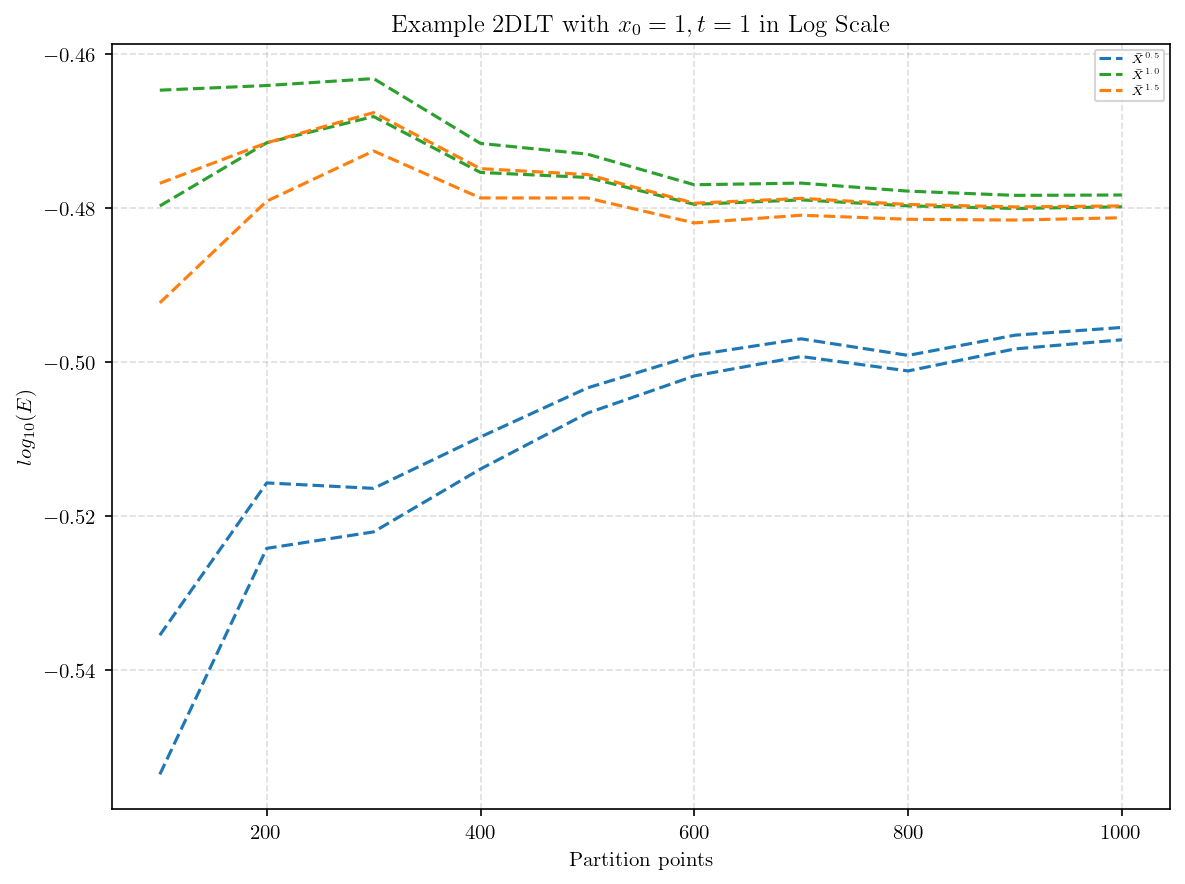

image saved to: sim_pics/2DD1SM3_log_single.png


In [17]:
#2DD1SM3_log
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path

# 设置字体（根据系统环境可能需要调整，如 'SimHei', 'Arial Unicode MS' 等）
plt.rcParams['font.family'] = 'Hiragino Sans'  
save_dir = Path("sim_pics")  # フォルダー保存先
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "2DD1SM3_log_single.png"  # 画像保存パス

# 信頼水準(confidence level)の関数
def conf_level(a):  # aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a
    z = norm.ppf(1 - alpha / 2)
    return z

try:
    df2 = pd.read_csv("../data_source/2DD1SM3_100_1000_data.csv")
except FileNotFoundError:
    print("Warning: CSV file not found. Ensure the path is correct.")
    df2 = pd.DataFrame({'points': np.linspace(10, 100, 20)})
    df2['E'] = np.random.rand(20) * 0.1
    df2['Em'] = np.random.rand(20) * 0.1
    df2['E_1.5'] = np.random.rand(20) * 0.1
    df2['A'] = np.sin(df2['points']/10)
    df2['Am'] = np.sin(df2['points']/10) + 0.5
    df2['A_1.5'] = np.sin(df2['points']/10) + 1.0


# z信頼水準の計算
a = 0.95
z = conf_level(a)

A_std_df2   = np.sqrt(df2['E'])      # Aの標本標準偏差(SD)
Am_std_df2  = np.sqrt(df2['Em'])     # Amの標本標準偏差(SD)
A15_std_df2 = np.sqrt(df2['E_1.5'])  # A_1_5の標本標準偏差(SD)

paths = 10 * (df2['points'] ** 2)

# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)


# Confidence bands
A_up_df2     = df2['A']      + z * A_se_df2
A_low_df2    = df2['A']      - z * A_se_df2
Am_up_df2    = df2['Am']     + z * Am_se_df2
Am_low_df2   = df2['Am']     - z * Am_se_df2
A15_up_df2   = df2['A_1.5']  + z * A15_se_df2
A15_low_df2  = df2['A_1.5']  - z * A15_se_df2


# Confidence bands in Log scale
A_up_df2_log     = np.log10(abs(A_up_df2))
A_low_df2_log    = np.log10(abs(A_low_df2))
Am_up_df2_log    = np.log10(abs(Am_up_df2))
Am_low_df2_log   = np.log10(abs(Am_low_df2))
A15_up_df2_log   = np.log10(abs(A15_up_df2))
A15_low_df2_log  = np.log10(abs(A15_low_df2))
    

fig, ax = plt.subplots(figsize=(8, 6), dpi=150)


#(0.5)
ax.plot(df2["points"], A_up_df2_log,  linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax.plot(df2["points"], A_low_df2_log, linestyle="--", color="#1f77b4")

# (1.0)
ax.plot(df2["points"], Am_up_df2_log,  linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax.plot(df2["points"], Am_low_df2_log, linestyle="--", color="#2ca02c")

# (1.5)
ax.plot(df2["points"], A15_up_df2_log,  linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax.plot(df2["points"], A15_low_df2_log, linestyle="--", color="#ff7f0e")

# 
ax.set_title(r'Example 2DLT with $x_0=1,t=1$ in Log Scale')
ax.set_xlabel("Partition points")
ax.set_ylabel(r"$log_{10}(E)$")
ax.grid(True, linestyle="--", alpha=0.4)
ax.legend(fontsize=8, loc='best')
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)

### 2DD1SM3_Var

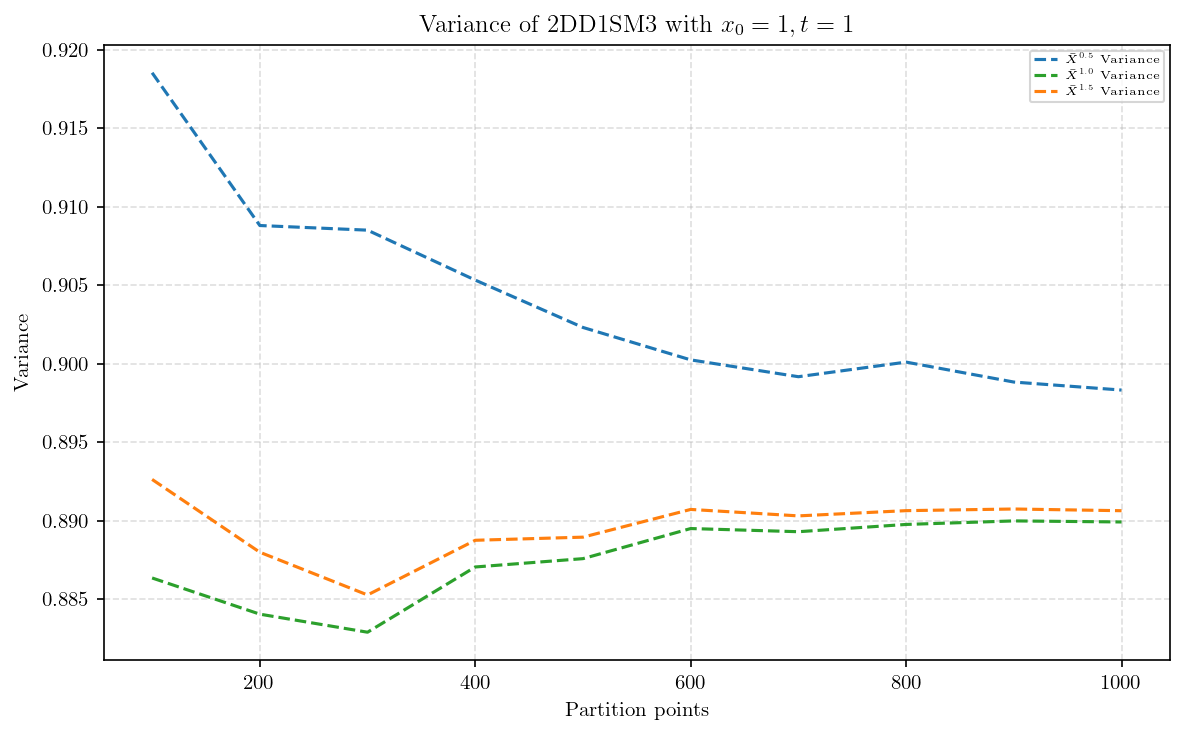

In [19]:
#2DD1SM3 variance plot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
df = pd.read_csv("../data_source/2DD1SM3_100_1000_data.csv")

#分散
variance_A = df['E']
variance_Am = df['Em']
variance_A15 = df['E_1.5']

plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df["points"], variance_A, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$ Variance")
plt.plot(df["points"], variance_Am, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ Variance")
plt.plot(df["points"], variance_A15, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ Variance")
plt.title(r'Variance of 2DD1SM3 with $x_0 =1,t=1$')
plt.xlabel("Partition points")
plt.ylabel("Variance")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
